# UDLR Two Dimentional Vision System Examples

In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline
import csv
import networkx as nx
import networkx as nx
from matplotlib import pyplot, patches

from CoreESN import *
from utils import *


import pandas as pd

In [2]:
esn = MyESN()
esn.input_multiplier=10
esn.create_experiment()
esn.performance

activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation shape : [434] 
activation s

AttributeError: 'MyESN' object has no attribute 'results'

In [ ]:
esn.experiment_targets.shape

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
#z = np.linspace(-2, 2, 100)
#r = z**2 + 1
#x = r * np.sin(theta)
#y = r * np.cos(theta)
for i in [0,1,2,3]:
    y =  esn.experiment_targets[i,] * esn.input_multiplier
    x = np.arange(y.shape[0])
    z =  np.ones(x.shape) *i

    ax.plot(x, z, y, label='class %s' % i)
ax.legend()
plt.savefig('InputClasses.png',transparent=True)
plt.show()

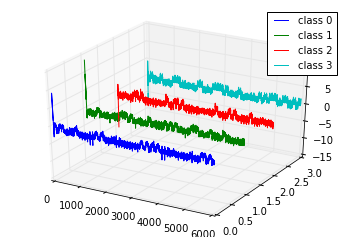

In [6]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
#z = np.linspace(-2, 2, 100)
#r = z**2 + 1
#x = r * np.sin(theta)
#y = r * np.cos(theta)
for i in [0,1,2,3]:
    y =  esn.prediction.T[i,]
    x = np.arange(y.shape[0])
    z =  np.ones(x.shape) *i

    ax.plot(x, z, y, label='class %s' % i)
ax.legend()

plt.show()

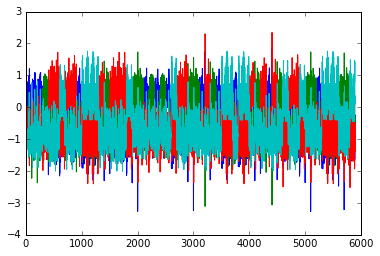

In [10]:
for k in [0,1,2,3]:
    plt.plot(esn.prediction[100:,k])
plt.savefig('all_outputs.png')

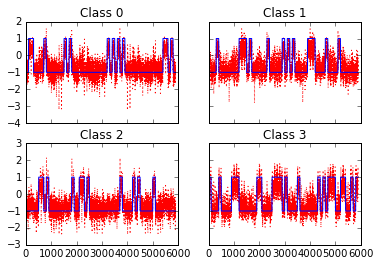

In [7]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
axs = [ax1,ax2,ax3,ax4]
for k in [0,1,2,3]:
    axs[k].plot(esn.prediction[100:,k],':r')
    axs[k].plot(esn.experiment_targets.T[esn.future+100:,k],'b')
    axs[k].set_title('Class %s' % k)
plt.savefig('OutputClasses.png')
plt.show()

# Create outputs from 1-1 and 0s for horizontals

In [8]:
esn = MyESN()
esn.input_multiplier=10
esn.create_esn()
esn.generate_data()


In [9]:
esn.experiment_classes

array([1, 1, 1, ..., 2, 2, 2])

In [10]:
# We want to re-configure the data targets such that Up and Down are 1 and -1, with LR 0, and vice versa
"""
0 = Up
1 = Left
2 =  Down
3 =  Right
"""

opposing = { 0:2,1:3,2:0,3:1}
    
targets = np.zeros(esn.experiment_targets.shape)
for i in np.arange(targets.shape[1]):
    targets[esn.experiment_classes[i],i] = 1
    targets[opposing[esn.experiment_classes[i]],i] =  -1
    
esn.experiment_targets = targets

In [11]:
esn.input_multiplier = 10
esn.fit()
esn.predict()
esn.analyse_results()

1.0

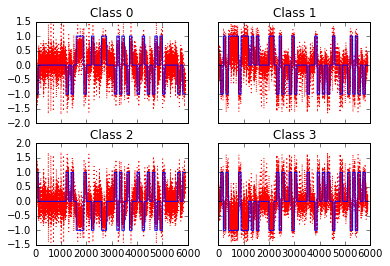

In [13]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
axs = [ax1,ax2,ax3,ax4]
for k in [0,1,2,3]:
    axs[k].plot(esn.prediction[100:,k],':r')
    axs[k].plot(esn.experiment_targets.T[esn.future+100:,k],'b')
    axs[k].set_title('Class %s' % k)
plt.savefig('OutputClasses.png')
plt.show()

# Extract X/Y Positions

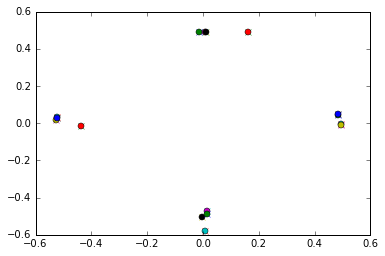

In [15]:

for c in esn.results.keys():
    for i,p in enumerate(esn.results[c]):
        plt.plot(esn.results[c][0][i],esn.results[c][1][i],'x')
        plt.plot(-esn.results[c][2][i],-esn.results[c][3][i],'o')
    